# **1. Load and Inspect the Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/dataset_heart.csv")

# Display the first few rows of the dataset
data.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# 2. Data Cleaning and Formatting

**2.1 Get an Overview of the Data**

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

**2.2 Check for Missing Values**

In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64


**2.3 Check for Duplicates**

In [6]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates if any are found
data = data.drop_duplicates()

Number of duplicate rows: 0


**2.4 Convert Data Types if Necessary**

In [7]:
# Example of changing column data type, e.g., if 'sex' is a categorical variable
if 'sex' in data.columns:
    data['sex'] = data['sex'].astype('category')


# 3. Exploratory Data Analysis (EDA)

**3.1 Dimensions of the Data**

In [8]:
# Check the shape of the data
print(f"Dataset dimensions: {data.shape}")

Dataset dimensions: (270, 14)


**3.2 Summary Statistics**

In [9]:
# Generate summary statistics for numeric columns
data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


**3.3 Visualizations**

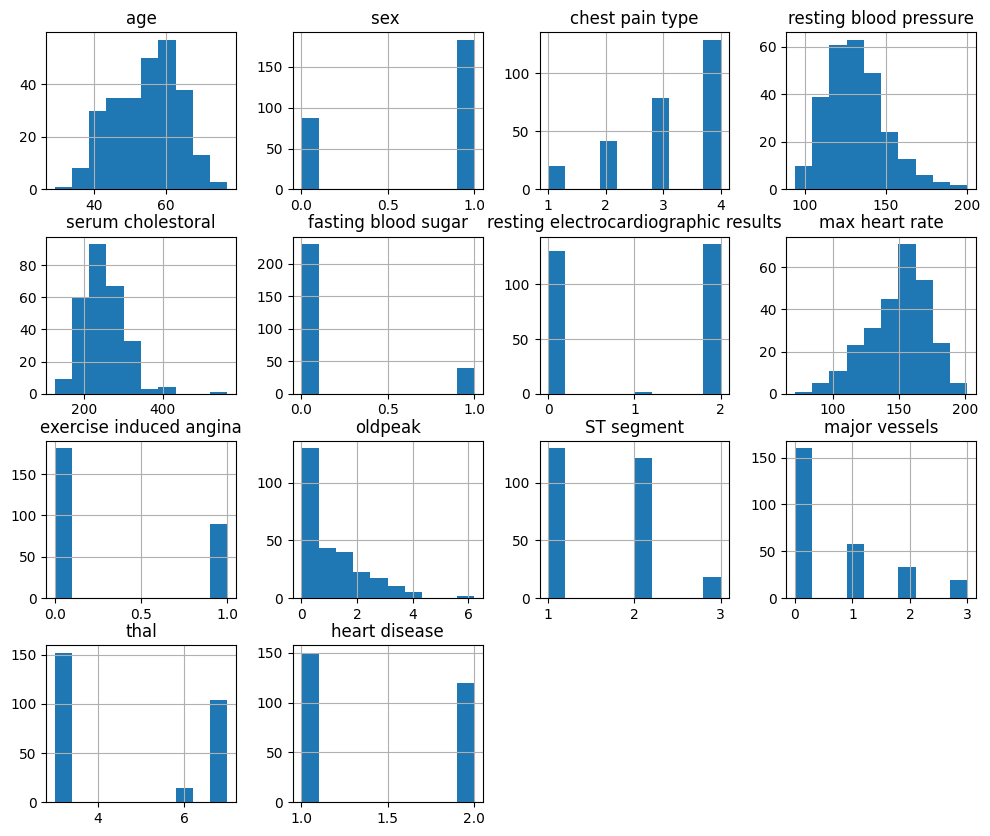

In [17]:
# Plot histograms for each numerical column
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()

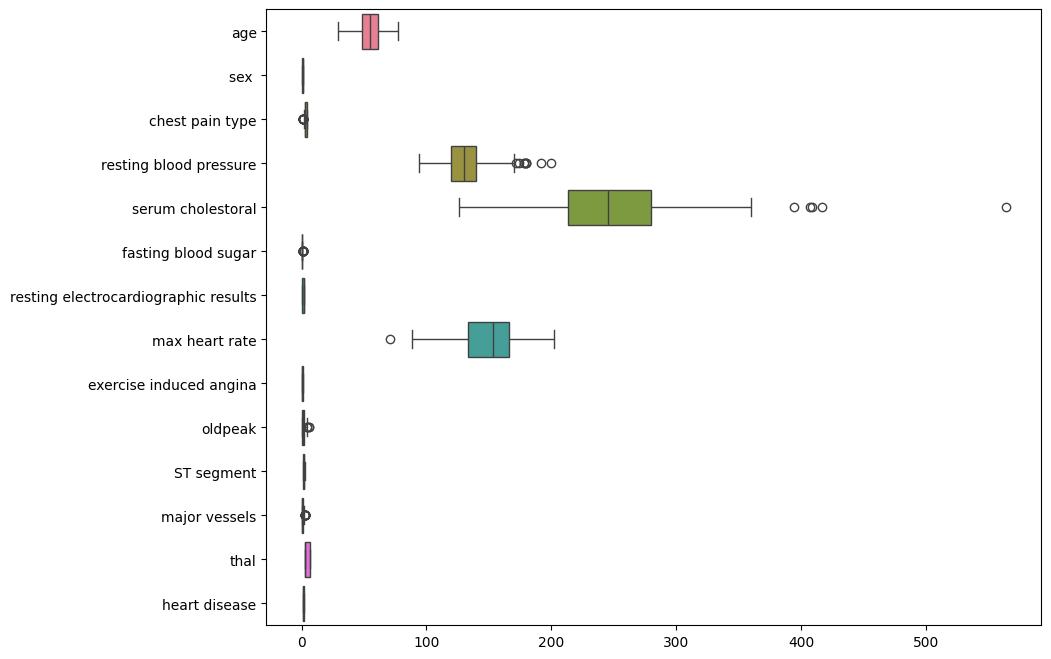

In [18]:
# Plot boxplots for all features
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient='h')
plt.show()

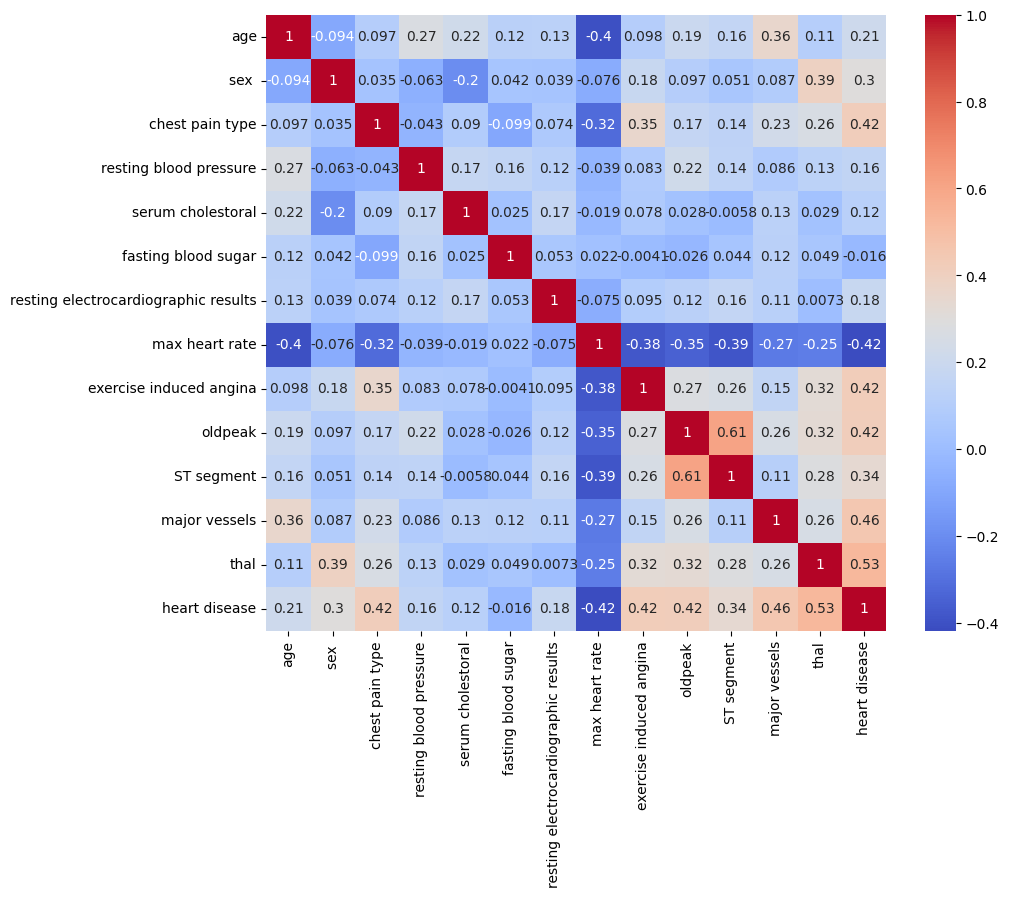

In [16]:
# Generate a correlation matrix and plot as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 4. Feature Engineering and Selection


**4.1 Encoding Categorical Variables**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables, for example 'sex'
if 'sex' in data.columns:
    data['sex'] = LabelEncoder().fit_transform(data['sex'])


**4.2. Feature Selection Based on Correlation**

In [27]:
import pandas as pd
import numpy as np
# Drop features with low correlation to heart disease
# Selected features based on correlation analysis
selected_features = [
    'chest pain type',      # Correlation ~ 0.42 with target
    'oldpeak',              # Correlation ~ 0.42 with target
    'ST segment',           # Correlation ~ 0.34 with target
    'major vessels',        # Correlation ~ 0.46 with target
    'thal',                 # Correlation ~ 0.53 with target
    'max heart rate'        # Correlation ~ -0.42 with target
]

# Keep only the selected features and the target variable
data_selected = data[selected_features + ['heart disease']]
data_selected.head()


,chest pain type,oldpeak,ST segment,major vessels,thal,max heart rate,heart disease
0,4,2.4,2,3,3,109,2
1,3,1.6,2,0,7,160,1
2,2,0.3,1,0,7,141,2
3,4,0.2,2,1,7,105,1
4,2,0.2,1,1,3,121,1


# 5. Train and Test Split with Cross-Validation

**5.1  Split the Data**

In [29]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('heart disease', axis=1)
y = data['heart disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5.2 Cross-Validation**

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.68181818 0.79069767 0.90697674 0.88372093 0.76744186]
Average cross-validation score: 0.8061310782241016


# 6. Model Comparison

**6.1 Train and Compare Models**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name}: {accuracy}")

Logistic Regression: 0.9074074074074074
Random Forest: 0.7962962962962963
SVM: 0.6296296296296297


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 7. Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


# 8. Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.91      0.87        33
           2       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54

ROC-AUC Score: 0.8759018759018758


# 9. Interpretation and Reporting

**9.1 Feature Importance**

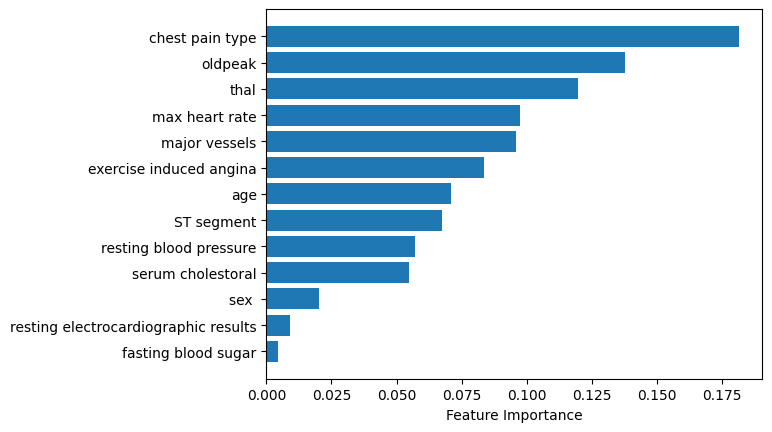

In [35]:
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

**9.2 Confusion Matrix**

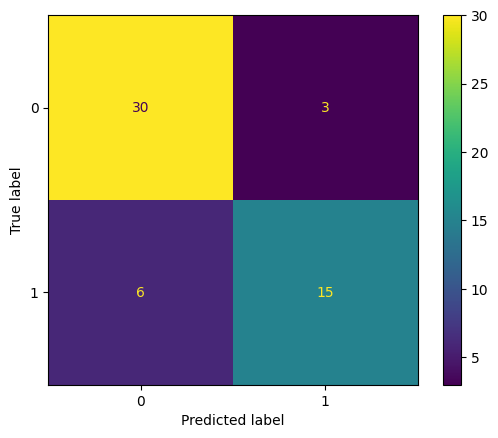

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [59]:
import numpy as np

# Example of new input to get a low probability of heart disease
new_data_selected = np.array([[1, 0.0, 1, 0, 3, 180]])

# Create a new empty array with all 13 features
new_data = np.zeros((1, 13))

# Map the low-risk values to the corresponding feature indices in the 13-feature array
selected_feature_indices = [2, 8, 11, 12, 9, 10]

for i, index in enumerate(selected_feature_indices):
    new_data[0, index] = new_data_selected[0, i]

# Predict probabilities
prediction_proba = best_model.predict_proba(new_data)

# Define a custom threshold for predicting heart disease
threshold = 0.6  # Adjust this threshold as needed

# Output the probability of each class
print(f"Probability of no disease: {prediction_proba[0][0] * 100:.2f}%")
print(f"Probability of having disease: {prediction_proba[0][1] * 100:.2f}%")

# Apply custom threshold to make a prediction
if prediction_proba[0][1] > threshold:
    print("Custom Prediction: The individual is likely to have heart disease.")
else:
    print("Custom Prediction: The individual is unlikely to have heart disease.")


Probability of no disease: 38.90%
Probability of having disease: 61.10%
Custom Prediction: The individual is likely to have heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
